In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("Mall_Customers.csv")

In [4]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
# Here we have to get the input parameter as "Annual_Income" and "Spending_Score" we are going to cluster it.
# Here We dont want to Split as X_train ans y_train. But Instead we go with "X" only
# go only with one variable
x = dataset.iloc[:, [3,4]].values #iloc means We can spot the columns with the respective position/index.
#Iloc = Column wise selection[:, [3,4]] or [:, 3:5]
# :,: => for all rows, and all columns
# If we leave it as empty instead of putting columns (:) It will consider it as an empty irrespective of row/columns.
# if the code is like [:,[3, 4]] means We should take only 3rd and 4th column

In [6]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
from sklearn.cluster import OPTICS

optics_model = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
labels = optics_model.fit_predict(x)

# Manually compute cluster centers (like DBSCAN, OPTICS has no cluster_centers_)
cluster_centers = []
for cluster_id in set(labels):
    if cluster_id != -1:  # skip noise
        cluster_points = x[labels == cluster_id]
        cluster_centers.append(cluster_points.mean(axis=0))

cluster_centers = np.array(cluster_centers)

C:\Anaconda3\envs\AIML\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Anaconda3\envs\AIML\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Anaconda3\envs\AIML\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Anaconda3\envs\AIML\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Anaconda3\envs\AIML\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning

In [8]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,
       -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1,  3, -1,  3, -1,  3,  2,  3,  2,  3, -1,  3,  2,  3,
        2,  3,  2,  3,  2,  3, -1,  3,  2,  3, -1,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3, -1,  3,  2,  3,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3, -1,  3,  2,
        3,  2,  3,  2, -1,  3,  3, -1, -1, -1, -1, -1, -1])

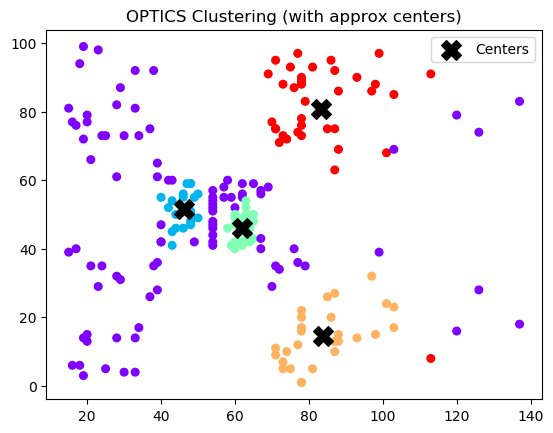

In [9]:
# Visualization
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='rainbow', s=30)

if len(cluster_centers) > 0:
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
                color='black', marker='X', s=200, label='Centers')
plt.title("OPTICS Clustering (with approx centers)")
plt.legend()
plt.show()

In [10]:
# We'll get the MODEL Creation and Prediction as well.

# So here we don't want to split the training set and test set like we did it in the classification and regressions

In [11]:
# Here we should create a seperate column for predicted output.
#supervised=pd.DataFrame(dataset)

supervised = dataset
# (OR) Simply we can give supervised = dataset

In [12]:
supervised['Cluster_group']=labels

In [13]:
supervised

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,-1
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [14]:
supervised.to_csv("cluster.csv", index=False) # If we give an Index=false, It'll not again it'll create an unnamed column in the S.No section.

In [16]:
cluster_centers = np.array(cluster_centers) #dir(kmeans) => To list all of it's functions and classes

In [17]:
cluster_centers

array([[46.09090909, 51.63636364],
       [62.        , 46.04347826],
       [83.92592593, 14.44444444],
       [83.38888889, 80.72222222]])

In [18]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,
       -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1,  3, -1,  3, -1,  3,  2,  3,  2,  3, -1,  3,  2,  3,
        2,  3,  2,  3,  2,  3, -1,  3,  2,  3, -1,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3, -1,  3,  2,  3,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3, -1,  3,  2,
        3,  2,  3,  2, -1,  3,  3, -1, -1, -1, -1, -1, -1])

In [19]:
# Optional Codes = If we need to display only 3rd column
supervised.columns[3]

'Annual Income (k$)'

In [20]:
# Optional Codes = If we need to display all the columns
supervised.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

C:\Anaconda3\envs\AIML\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


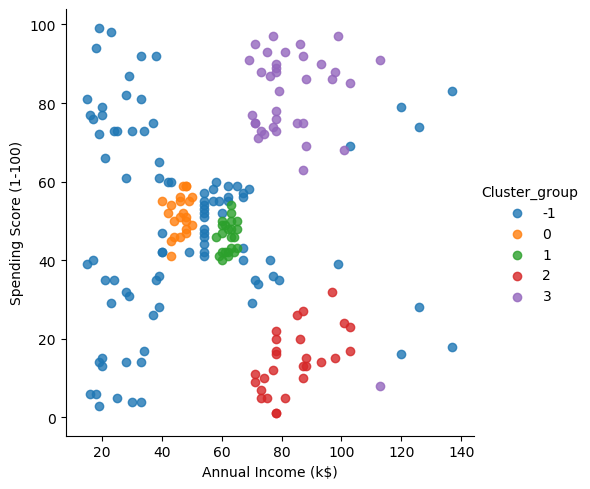

In [21]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                  fit_reg=False, legend=True, legend_out=True)

# Hue is for COLOR Differentiation